In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, dendrogram

In [34]:
df = pd.read_csv(r'podaci\clickstream+data+for+online+shopping\e-shop clothing 2008 preprocessed.csv', encoding='cp1252', sep=',')  # dodaj parametar sheet_name= ako ima više listova
print(df.columns)

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'main category', 'clothing model', 'colour', 'location',
       'model photography', 'price', 'price 2', 'page'],
      dtype='object')


In [35]:
df

,year,month,day,order,country,session ID,main category,clothing model,colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


In [36]:
df = df.drop('session ID',axis=1)

In [37]:
X = df
X

,year,month,day,order,country,main category,clothing model,colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,3,87,12,1,1,43,1,1


In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [39]:
scaler = StandardScaler()
X_sca = scaler.fit_transform(X)

In [40]:
def plot_clusters(X, labels, title):
    X = np.array(X)
    if X.ndim == 1:
        raise ValueError("Input data X must be 2D for plotting clusters.")
    if X.shape[1] < 2:
        raise ValueError("Input data X must have at least two features (columns) for 2D plotting.")
    print(title,"Silhouette:", silhouette_score(X, labels) if len(set(labels)) > 1 else "N/A")
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    plt.title(title)
    plt.grid(True)
    plt.show()

MiniBatch KMeans Silhouette: 0.5577145514554098


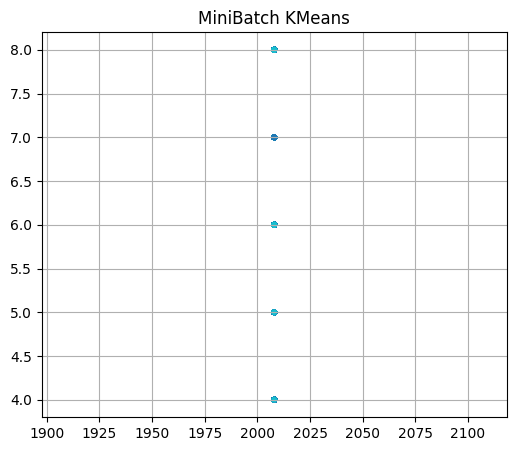

MiniBatch KMeans + PCA Silhouette: 0.6242751984438519


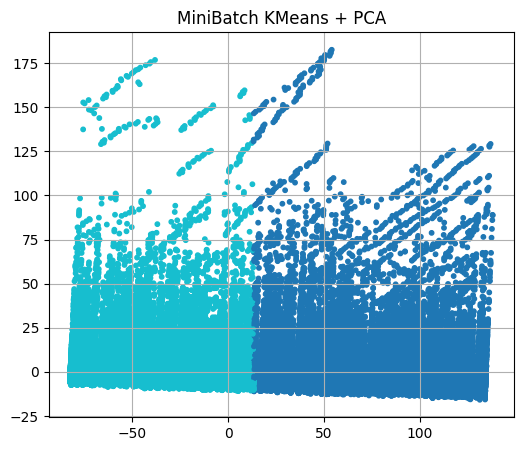

KeyboardInterrupt: 

In [41]:
from sklearn.cluster import MiniBatchKMeans
# Najbolji rez na 2 klastera
for i in range(2,3):
    mb_kmeans = MiniBatchKMeans(n_clusters=i, random_state=123)
    
    mb_kmeans.fit(X)
    labels_mb = mb_kmeans.labels_
    plot_clusters(X, labels_mb, 'MiniBatch KMeans')

    mb_kmeans.fit(X_pca)
    labels_mb_pca = mb_kmeans.labels_
    plot_clusters(X_pca, labels_mb_pca, 'MiniBatch KMeans + PCA')
    
    mb_kmeans.fit(X_sca)
    labels_mb_sca = mb_kmeans.labels_
    plot_clusters(X_sca, labels_mb_sca, 'MiniBatch KMeans + SCA')

In [ ]:
from sklearn.cluster import SpectralClustering

for i in range(2,3):
    spectral = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=123)

    labels_spectral = spectral.fit_predict(X)
    plot_clusters(X, labels_spectral, 'Spectral Clustering')

    labels_spectral_pca = spectral.fit_predict(X_pca)
    plot_clusters(X_pca, labels_spectral_pca, 'Spectral Clustering + PCA')

    labels_spectral_sca = spectral.fit_predict(X_sca)
    plot_clusters(X_sca, labels_spectral_sca, 'Spectral Clustering + SCA')

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import KMeans

for i in range(2,3):
    kmeans = KMeans(n_clusters=i , init='k-means++', random_state=123)

    labels_kmeans = kmeans.fit_predict(X)
    plot_clusters(X, labels_kmeans, 'KMeans++')

    labels_kmeans_pca = kmeans.fit_predict(X_pca)
    plot_clusters(X_pca, labels_kmeans_pca, 'KMeans++ + PCA')

    labels_kmeans_sca = kmeans.fit_predict(X_sca)
    plot_clusters(X_sca, labels_kmeans_sca, 'KMeans++ + SCA')

In [ ]:
import faiss

X_faiss = X.astype(np.float32)

for i in range(2,3):
    faiss_kmeans = faiss.Kmeans(d=X.shape[1], k=i)
    faiss_kmeans.train(X_faiss)

    D, I = faiss_kmeans.index.search(X_faiss, 1)
    labels_faiss = I.flatten()
    plot_clusters(X, labels_faiss, 'Faiss KMeans')

In [ ]:
X_faiss = X_pca.astype(np.float32)

for i in range(2,3):
    faiss_kmeans = faiss.Kmeans(d=X_faiss.shape[1], k=i)
    faiss_kmeans.train(X_faiss)

    D, I = faiss_kmeans.index.search(X_faiss, 1)
    labels_faiss = I.flatten()
    plot_clusters(X_pca, labels_faiss, 'Faiss KMeans + PCA')

STARI KOD

In [ ]:
# for i in range(2,5):
#     kmeans = KMeans(n_clusters=i, random_state=123)
#     labels_kmeans = kmeans.fit_predict(X)

#     print("KMeans Silhouette:", silhouette_score(X, labels_kmeans))
#     df['KMeans_Cluster'] = labels_kmeans


#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)
# #
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['KMeans_Cluster'], palette='viridis')
#     plt.title('KMeans')
#     plt.show()

In [ ]:
# for i in [1.2,1.5,2.0]:
#     dbscan = DBSCAN(eps=i, min_samples=2)
#     labels_dbscan = dbscan.fit_predict(X)

#     print("DBSCAN Silhouette:", silhouette_score(X, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")
#     df['DBSCAN_Cluster'] = labels_dbscan
    
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DBSCAN_Cluster'], palette='viridis')
#     plt.title('DBSCAN')
#     plt.show()

In [ ]:
# for i in [5,10]:
#     dbscan = DBSCAN(eps=1.2, min_samples=i)
#     labels_dbscan = dbscan.fit_predict(X)

#     print("DBSCAN Silhouette:", silhouette_score(X, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")
#     df['DBSCAN_Cluster'] = labels_dbscan
    
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DBSCAN_Cluster'], palette='viridis')
#     plt.title('DBSCAN')
#     plt.show()

In [ ]:
# for i in [15]:
#     dbscan = DBSCAN(eps=1.2, min_samples=i)
#     labels_dbscan = dbscan.fit_predict(X)

#     print("DBSCAN Silhouette:", silhouette_score(X, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A")
#     df['DBSCAN_Cluster'] = labels_dbscan
    
#     pca = PCA(n_components=2)
#     X_pca = pca.fit_transform(X)

#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DBSCAN_Cluster'], palette='viridis')
#     plt.title('DBSCAN')
#     plt.show()

In [ ]:
# X_sample = resample(X, n_samples=1000, random_state=123)

In [ ]:
# agg = AgglomerativeClustering(n_clusters=2)
# labels_agg = agg.fit_predict(X_sample)

# print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_sample, labels_agg))

In [ ]:
# linked = linkage(X_sample, method='ward')

# plt.figure(figsize=(12, 6))
# dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
# plt.title('Dendogram')
# plt.show()

Asocijativna analiza

In [ ]:
# from mlxtend.frequent_patterns import apriori, association_rules
# from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# df

Grupisemo po sesijama

In [ ]:
# transactions = df.groupby("session ID")["page 1 (main category)"].apply(list).tolist()

In [ ]:
# te = TransactionEncoder()
# te_array = te.fit(transactions).transform(transactions)

# df_encoded = pd.DataFrame(te_array, columns=te.columns_)
# df_encoded

In [ ]:
# frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# rules

In [ ]:
# frequent_itemsets